<a href="https://colab.research.google.com/github/VeraKutyavina/ml-tasks/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# add file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file «train.csv» with length 61194 bytes


In [ ]:
# imports

import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


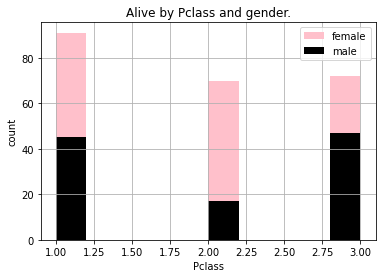

In [ ]:
# Распределение выживших среди мужчин и женщин по классу билета.
men = data[data['Sex'] == 'male']
women = data[data['Sex'] == 'female']

women[women['Survived'] == 1]['Pclass'].hist(color="pink", label='female')
men[men['Survived'] == 1]['Pclass'].hist(color="black", label='male')
plt.title('Alive by Pclass and gender.')
plt.xlabel('Pclass')
plt.ylabel('count')
plt.legend(loc='upper right');

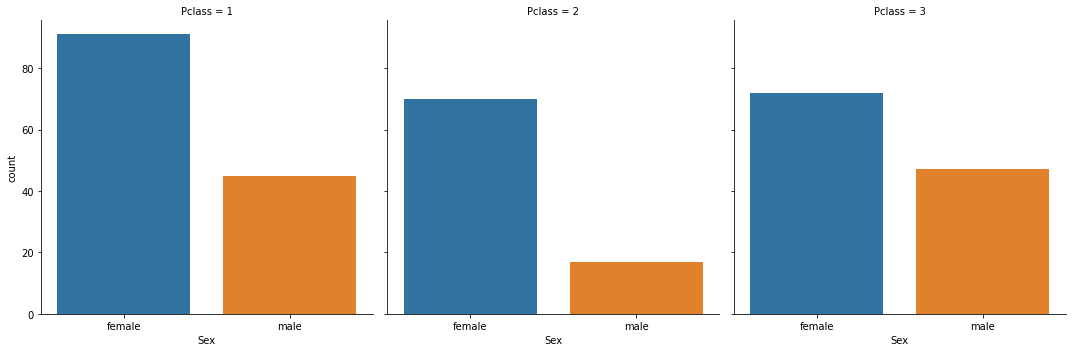

In [ ]:
sns.catplot(data = data[data['Survived'] == 1],x='Sex',col='Pclass',
            kind='count')

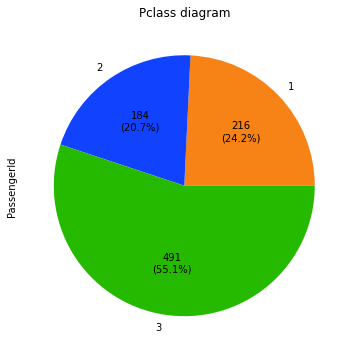

In [ ]:
# 2. Построить круговую диаграмму для признака "класс пассажира" (количество людей в каждом классе)

def get_description(val, values):
    absolute = int(val/100.*np.sum(values))
    return "{:d}\n({:.1f}%)".format(absolute, val)

colors = ['#F78216','#1143fe','#25b900']

pclass_count = data.groupby('Pclass')['PassengerId'].count()

pclass_count.plot(kind='pie', figsize=(12, 6), colors=colors, title='Pclass diagram', autopct=lambda val: get_description(val, pclass_count))

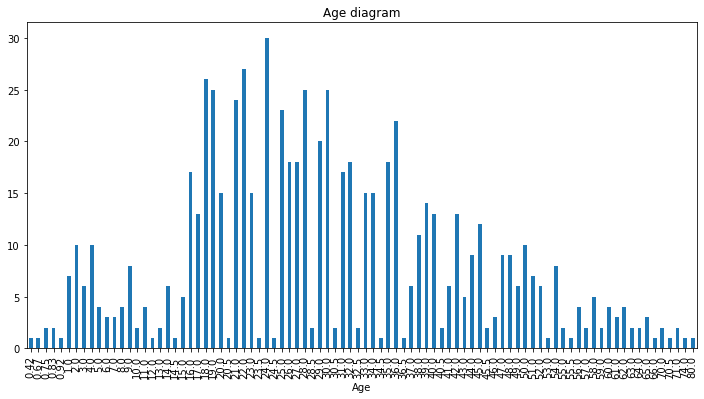

In [200]:
# 3. Построить распределение возрастов всех пассажиров.
age_count = data.groupby('Age')['PassengerId'].count()

age_count.dropna().plot(kind='bar', figsize=(12, 6), title='Age diagram')